<a href="https://colab.research.google.com/github/jeochris/Recommender-System-Study/blob/main/Latent_Factor_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

데이터 출처
- Kaggle : Movielens (https://www.kaggle.com/sengzhaotoo/movielens-small)

해당 자료는 아래 링크에서 참조했습니다.
- https://lsjsj92.tistory.com/569?category=853217

# 데이터 전처리

In [1]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse.linalg import svds

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [4]:
rating = pd.read_csv('/content/drive/Othercomputers/내 PC/DEV/DSL/심화스터디/Recommender/movielens/ratings.csv')
rating.drop('timestamp', axis = 1, inplace=True)
rating.head()

,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0


In [5]:
rating.shape

(100004, 3)

In [8]:
movie = pd.read_csv('/content/drive/Othercomputers/내 PC/DEV/DSL/심화스터디/Recommender/movielens/movies.csv')
movie.drop('genres', axis = 1, inplace=True)
movie.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [9]:
movie.shape

(9125, 2)

In [10]:
user_movie_data = pd.merge(rating, movie, on = 'movieId')
user_movie_data.head()

,userId,movieId,rating,title
0,1,31,2.5,Dangerous Minds (1995)
1,7,31,3.0,Dangerous Minds (1995)
2,31,31,4.0,Dangerous Minds (1995)
3,32,31,4.0,Dangerous Minds (1995)
4,36,31,3.0,Dangerous Minds (1995)


In [11]:
user_movie_data.shape

(100004, 4)

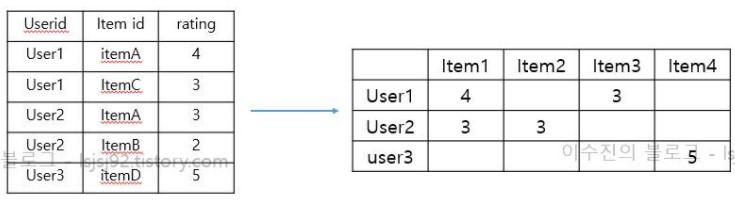

- item, user matrix로 형태 바꾸기

In [12]:
user_movie_rating = user_movie_data.pivot_table('rating', index = 'userId', columns='title').fillna(0)
user_movie_rating.head()

title,"""Great Performances"" Cats (1998)",$9.99 (2008),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),...,Zulu (1964),Zulu (2013),[REC] (2007),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931),İtirazım Var (2014)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
user_movie_rating.shape

(671, 9064)

In [17]:
# 주의: ndarray
movie_user_rating = user_movie_rating.values.T
movie_user_rating.shape

(9064, 671)

# Matrix Factorization 1) 비슷한 영화 추천

- 사이킷런에서 제공해주는 truncated SVD는 시그마 행렬의 대각원소(특이값) 가운데 상위 n개만 골라낸 것입니다. 이렇게 하면 기존 행렬 A의 성질을 100% 원복할 수는 없지만, (그 만큼 데이터 정보를 압축) 행렬 A와 거의 근사한 값이 나오게 됩니다.

In [18]:
SVD = TruncatedSVD(n_components=12)
matrix = SVD.fit_transform(movie_user_rating)
matrix.shape

(9064, 12)

In [19]:
matrix[0]

array([ 0.01227491,  0.00250758,  0.01554937, -0.03394137, -0.01444241,
        0.003674  , -0.00223324,  0.04348399, -0.01628669, -0.02104332,
        0.01207962, -0.01060314])

- 12개 component로 차원 축소!
- 이 12개 component 기반 유사한 아이템 추출하자 -> 상관계수 파악

In [20]:
corr = np.corrcoef(matrix)
corr.shape

(9064, 9064)

- 가오갤과 비슷한 영화들

In [21]:
movie_title = user_movie_rating.columns
movie_title_list = list(movie_title)
coffey_hands = movie_title_list.index("Guardians of the Galaxy (2014)")
coffey_hands

3405

In [22]:
corr_coffey_hands  = corr[coffey_hands]
corr_coffey_hands >= 0.9

array([False, False, False, ..., False, False, False])

In [23]:
list(movie_title[(corr_coffey_hands >= 0.9)])[:50]

['2 Guns (2013)',
 '2012 (2009)',
 '21 (2008)',
 '300: Rise of an Empire (2014)',
 'Abduction (2011)',
 'Adjustment Bureau, The (2011)',
 'Adventures of Tintin, The (2011)',
 'Alice in Wonderland (2010)',
 'Amazing Spider-Man, The (2012)',
 'Angels & Demons (2009)',
 'Ant-Man (2015)',
 'Avatar (2009)',
 'Avengers, The (2012)',
 'Avengers: Age of Ultron (2015)',
 'Batman: The Dark Knight Returns, Part 1 (2012)',
 'Batman: The Dark Knight Returns, Part 2 (2013)',
 'Battle: Los Angeles (2011)',
 'Beowulf (2007)',
 'Big Hero 6 (2014)',
 'Bolt (2008)',
 'Brave (2012)',
 'Captain America: Civil War (2016)',
 'Captain America: The First Avenger (2011)',
 'Captain America: The Winter Soldier (2014)',
 'Chronicle (2012)',
 'Click (2006)',
 'Cloverfield (2008)',
 'Cop Out (2010)',
 'Dark Knight Rises, The (2012)',
 'Diary of a Wimpy Kid (2010)',
 'District 9 (2009)',
 'Dredd (2012)',
 'Drillbit Taylor (2008)',
 'Déjà Vu (Deja Vu) (2006)',
 'Edge of Tomorrow (2014)',
 'Elysium (2013)',
 "Ender's 

# Matrix Factorization 2) 사용자 추천

In [24]:
df_user_movie_rating = user_movie_data.pivot_table('rating', index = 'userId', columns='movieId').fillna(0)
df_user_movie_rating.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


1. pivot table을 matrix로 변환
2. np.mean(axis = 1)을 통해 각 사용자들이 매기는 평점 평균을 구함
3. 1에서 구한 값과 2에서 구한 값을 빼서 사용자-평균 데이터 값을 변경

In [26]:
# matrix는 pivot_table 값을 numpy matrix로 만든 것 
matrix = df_user_movie_rating.to_numpy()
print(matrix.shape)
matrix

(671, 9066)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.],
       [5., 0., 0., ..., 0., 0., 0.]])

In [28]:
# user_ratings_mean은 사용자의 평균 평점 
user_ratings_mean = np.mean(matrix, axis = 1)
print(user_ratings_mean.shape)
user_ratings_mean[0]

(671,)


0.005625413633355393

In [29]:
# R_user_mean : 사용자-영화에 대해 사용자 평균 평점을 뺀 것.
matrix_user_mean = matrix - user_ratings_mean.reshape(-1, 1)
matrix_user_mean

array([[-0.00562541, -0.00562541, -0.00562541, ..., -0.00562541,
        -0.00562541, -0.00562541],
       [-0.02923009, -0.02923009, -0.02923009, ..., -0.02923009,
        -0.02923009, -0.02923009],
       [-0.02007501, -0.02007501, -0.02007501, ..., -0.02007501,
        -0.02007501, -0.02007501],
       ...,
       [-0.01367748, -0.01367748, -0.01367748, ..., -0.01367748,
        -0.01367748, -0.01367748],
       [ 3.98698434, -0.01301566, -0.01301566, ..., -0.01301566,
        -0.01301566, -0.01301566],
       [ 4.95030885, -0.04969115, -0.04969115, ..., -0.04969115,
        -0.04969115, -0.04969115]])

- user별 평균 고려해 dataframe 다시 구성

In [30]:
pd.DataFrame(matrix_user_mean, columns = df_user_movie_rating.columns).head()

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
0,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,...,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625
1,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,3.970770,...,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230
2,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,...,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075
3,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,3.902162,...,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838
4,-0.043128,-0.043128,3.956872,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128,...,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128


이번에는 scipy를 이용해 Truncated SVD를 구해봅니다.

이 둘의 차이점은 scikit learn에서 제공해주는 TruncatedSVD는 U, Sigma, Vt 반환 값을 제공하지 않습니다.
하지만, Scipy를 이용하면 이 반환값들을 제공받을 수 있죠.

In [34]:
U, sigma, Vt = svds(matrix_user_mean, k = 12)
print(U.shape)
print(sigma.shape)
print(Vt.shape)

(671, 12)
(12,)
(12, 9066)


In [35]:
sigma

array([105.72437051, 110.15522471, 116.29714259, 118.66831462,
       122.82232277, 135.96585855, 138.92664501, 145.53348705,
       160.48685586, 199.93327534, 242.13488251, 462.13504865])

현재 이 Sigma 행렬은 0이 아닌 값만 1차원 행렬로 표현된 상태입니다.
즉, 0이 포함된 대칭행렬로 변환할 때는 numpy의 diag를 이용해야 합니다.

In [36]:
sigma = np.diag(sigma)
print(sigma.shape)
print(sigma[0])
print(sigma[1])

(12, 12)
[105.72437051   0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.        ]
[  0.         110.15522471   0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.        ]


- 원본 행렬로 복구! - unknown 값 예측

In [37]:
# U, Sigma, Vt의 내적을 수행하면, 다시 원본 행렬로 복원이 된다. 
# 거기에 + 사용자 평균 rating을 적용한다. 
svd_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)

In [38]:
df_svd_preds = pd.DataFrame(svd_user_predicted_ratings, columns = df_user_movie_rating.columns)
df_svd_preds.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
0,-0.079686,0.021779,-0.013837,-0.005870,-0.028877,0.032371,0.000715,-0.004428,-0.005219,0.038195,...,-0.004324,-0.004352,0.010478,-0.004256,-0.003944,-0.005674,0.018157,-0.005575,-0.005297,-0.003766
1,1.428452,1.608841,0.529476,0.168278,0.520809,1.107473,0.529719,0.089376,0.296270,1.970031,...,0.013227,-0.002275,0.020680,-0.005245,-0.007644,-0.021019,0.031243,-0.000957,-0.000753,0.026901
2,0.977246,0.396971,0.000299,0.027444,0.021287,0.141458,-0.057134,0.031633,-0.012538,0.383576,...,0.002761,0.004907,-0.014190,-0.000251,-0.006007,-0.003189,-0.026916,0.014637,0.013287,-0.005741
3,1.870844,1.169993,0.252202,0.094831,-0.181713,-0.511953,-0.027820,-0.143080,0.013247,1.461694,...,0.026412,-0.027245,0.054681,0.018450,0.034544,-0.035740,0.088889,-0.019365,-0.017113,0.066559
4,1.182777,0.924903,0.075998,0.061505,0.602680,-0.159825,0.339925,0.081534,-0.079666,0.535018,...,-0.029124,-0.029357,0.009064,-0.029092,-0.030890,-0.057453,0.026344,-0.024027,-0.024614,-0.032752


함수 설정
- 인자로 사용자 아이디, 영화 정보 테이블, 평점 테이블 등을 받음
- 사용자 아이디에 SVD로 나온 결과의 영화 평점이 가장 높은 데이터 순으로 정렬
- 사용자가 본 데이터를 제외
- 사용자가 안 본 영화에서 평점이 높은 것을 추천

In [40]:
def recommend_movies(df_svd_preds, user_id, ori_movies_df, ori_ratings_df, num_recommendations=5):
    
    #현재는 index로 적용이 되어있으므로 user_id - 1을 해야함.
    user_row_number = user_id - 1 
    
    # 최종적으로 만든 pred_df에서 사용자 index에 따라 영화 데이터 정렬 -> 영화 평점이 높은 순으로 정렬 됌
    sorted_user_predictions = df_svd_preds.iloc[user_row_number].sort_values(ascending=False)
    
    # 원본 평점 데이터에서 user id에 해당하는 데이터를 뽑아낸다. 
    user_data = ori_ratings_df[ori_ratings_df.userId == user_id]
    # 위에서 뽑은 user_data와 원본 영화 데이터를 합친다. 
    user_history = user_data.merge(ori_movies_df, on = 'movieId').sort_values(['rating'], ascending=False)
    

    # 원본 영화 데이터에서 사용자가 본 영화 데이터를 제외한 데이터를 추출
    recommendations = ori_movies_df[~ori_movies_df['movieId'].isin(user_history['movieId'])]
    # 사용자의 영화 평점이 높은 순으로 정렬된 데이터와 위 recommendations을 합친다. 
    recommendations = recommendations.merge( pd.DataFrame(sorted_user_predictions).reset_index(), on = 'movieId')
    # 컬럼 이름 바꾸고 정렬해서 return
    recommendations = recommendations.rename(columns = {user_row_number: 'Predictions'}).sort_values('Predictions', ascending = False).iloc[:num_recommendations, :]

    return user_history, recommendations

In [41]:
already_rated, predictions = recommend_movies(df_svd_preds, 330, movie, rating, 10)

In [42]:
already_rated.head(10)

,userId,movieId,rating,title
47,330,1094,5.0,"Crying Game, The (1992)"
14,330,213,5.0,Burnt by the Sun (Utomlyonnye solntsem) (1994)
34,330,527,5.0,Schindler's List (1993)
45,330,1035,5.0,"Sound of Music, The (1965)"
48,330,1172,5.0,Cinema Paradiso (Nuovo cinema Paradiso) (1989)
53,330,1249,5.0,"Femme Nikita, La (Nikita) (1990)"
27,330,373,5.0,Red Rock West (1992)
58,330,1428,5.0,Angel Baby (1995)
61,330,1575,5.0,Gabbeh (1996)
67,330,1683,5.0,"Wings of the Dove, The (1997)"


In [43]:
predictions

,movieId,title,Predictions
246,296,Pulp Fiction (1994),2.060064
294,356,Forrest Gump (1994),1.772814
497,608,Fargo (1996),1.526111
487,590,Dances with Wolves (1990),1.508960
316,380,True Lies (1994),1.276646
40,47,Seven (a.k.a. Se7en) (1995),1.265219
313,377,Speed (1994),1.142113
214,260,Star Wars: Episode IV - A New Hope (1977),1.076539
295,357,Four Weddings and a Funeral (1994),1.065911
488,592,Batman (1989),1.048861


# 확장해볼 거리
- user별 평균을 다른 방식으로 매기는게 나을듯
- 수업때 배운 것처럼 user bias, movie bias 함께 고려하는 hybrid 구현해봐도 좋을듯